In [1]:
from utils.utils import load_df

In [2]:
counts_df = load_df('counts_preprocessed.csv')
batches_meta_data = load_df('batches_meta_data_preprocessed.csv')

In [3]:
counts_df.merge(batches_meta_data, left_index=True, right_index=True)

,AHq000001,AHq000002,AHq000003,AHq000004,AHq000005,AHq000006,AHq000007,AHq000008,AHq000009,AHq000010,...,AHq024992,AHq024993,AHq024994,AHq025019,AHq025020,AHq025042,accession,month,seed_color,species
batch,,,,,,,,,,,,,,,,,,,,,
DEC_00390_2,864,6708,588,809,2240,1766,21,10188,589,3192,...,410,0,0,362,3139,0,AM00390,DEC,white,hypochondriacus
DEC_00390_5,638,4470,525,625,2076,2214,7,9465,392,1713,...,575,0,1,322,1549,0,AM00390,DEC,white,hypochondriacus
DEC_00390_6,668,3167,435,326,773,1964,17,6046,326,934,...,1718,2,1,119,1353,0,AM00390,DEC,white,hypochondriacus
DEC_00394_2,703,1806,413,428,838,1627,29,4767,314,894,...,204,0,0,342,1169,1,AM00394,DEC,pink,caudatus
DEC_00394_3,865,3253,733,909,1606,2434,8,5074,374,1640,...,335,2,3,401,1757,0,AM00394,DEC,pink,caudatus
DEC_00394_7,665,1629,452,274,392,1897,22,4100,285,525,...,895,4,2,109,826,2,AM00394,DEC,pink,caudatus
FEB_00390_1,315,997,312,562,666,1294,28,2372,235,906,...,66,0,0,363,1014,0,AM00390,FEB,white,hypochondriacus
FEB_00390_2,431,1349,225,127,383,526,10,2481,127,740,...,2290,2,3,154,1400,3,AM00390,FEB,white,hypochondriacus
FEB_00585_1,344,374,355,340,599,1579,39,3503,124,509,...,8724,56,24,155,516,19,AM00585,FEB,white,caudatus


In [4]:
hypochondriacus = batches_meta_data[batches_meta_data.species == 'hypochondriacus'].index
caudatus = batches_meta_data[batches_meta_data.species == 'caudatus'].index

In [5]:
counts_hypochondriacus = counts_df.loc[hypochondriacus].T
counts_hypochondriacus['sum_reads'] = counts_hypochondriacus.sum(axis=1)
counts_hypochondriacus.rename_axis("gene", inplace=True)
counts_hypochondriacus.sort_values('sum_reads', ascending=False, inplace=True)
counts_hypochondriacus

batch,DEC_00390_2,DEC_00390_5,DEC_00390_6,FEB_00390_1,FEB_00390_2,FEB_00587_1,FEB_00587_2,FEB_00587_3,sum_reads
gene,,,,,,,,,
AHq013036,1161305,2247145,693940,1896363,1319007,2418762,293163,99839,10129524
AHq018651,641719,1390331,1251921,1099256,823603,1388280,264370,38163,6897643
AHq007453,758592,1054929,815256,1405934,647797,1469061,272022,50424,6474015
AHq018650,416772,959679,598133,1154382,689838,1183541,218924,32678,5253947
AHq002711,2598052,1102362,548441,40953,478162,86651,143529,64979,5063129
...,...,...,...,...,...,...,...,...,...
AHq006100,0,0,0,0,0,0,0,0,0
AHq010988,0,0,0,0,0,0,0,0,0
AHq014701,0,0,0,0,0,0,0,0,0


In [6]:
counts_hypochondriacus[['sum_reads']][:10]

batch,sum_reads
gene,
AHq013036,10129524
AHq018651,6897643
AHq007453,6474015
AHq018650,5253947
AHq002711,5063129
AHq023691,4098516
AHq010543,2738883
AHq017218,2717153
AHq002793,2300374


In [7]:
counts_hypochondriacus[['DEC_00390_2']].sort_values('DEC_00390_2', ascending=False)[:10]

batch,DEC_00390_2
gene,
AHq002711,2598052
AHq023691,1206255
AHq013036,1161305
AHq007453,758592
AHq012208,658802
AHq018651,641719
AHq017218,478026
AHq018650,416772
AHq002793,391442


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_distribution(reads):

    # Create a histogram with Seaborn
    if len(reads) < 200:
        bins = len(reads)
    else:
        bins = 200

    # Plot the distribution using barplot for discrete index values
    sns.barplot(x=reads.index, y=reads.values)

    # Add labels and title
    plt.title("Distribution Plot with Seaborn")
    plt.xlabel("Gene")
    plt.ylabel("Reads")

    # Rotate x-axis labels by 45°
    plt.xticks(rotation=45)

    # Show the plot
    plt.show()

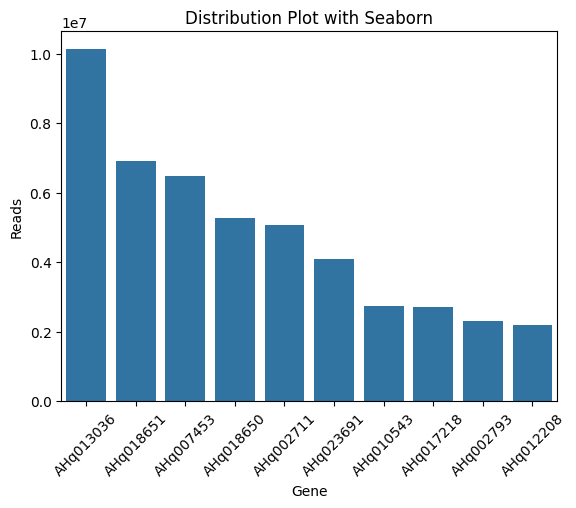

In [9]:
data = counts_hypochondriacus.sum_reads[(counts_hypochondriacus.sum_reads > 10000) & (counts_hypochondriacus.sum_reads < 20000)]

plot_distribution(counts_hypochondriacus[:10].sum_reads)

<Axes: xlabel='gene'>

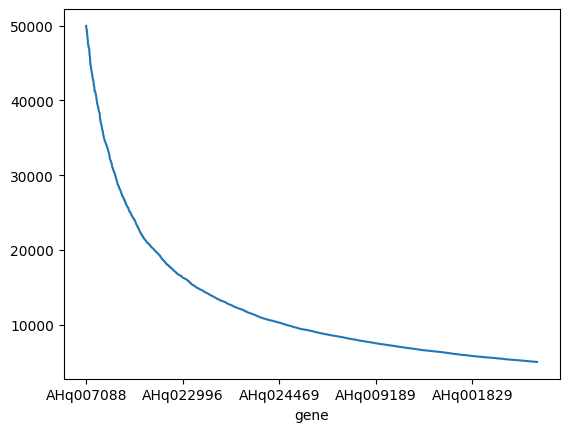

In [10]:
counts_hypochondriacus.sum_reads[(counts_hypochondriacus.sum_reads > 5000) & (counts_hypochondriacus.sum_reads < 50000)].plot()

In [11]:
counts_caudatus = counts_df.loc[caudatus].T
counts_caudatus['sum_reads'] = counts_caudatus.sum(axis=1)
counts_caudatus.sort_values('sum_reads', ascending=False)
counts_caudatus.rename_axis("gene")

batch,DEC_00394_2,DEC_00394_3,DEC_00394_7,FEB_00585_1,FEB_00585_3_WDH,sum_reads
gene,,,,,,
AHq000001,703,865,665,344,764,3341
AHq000002,1806,3253,1629,374,548,7610
AHq000003,413,733,452,355,497,2450
AHq000004,428,909,274,340,504,2455
AHq000005,838,1606,392,599,845,4280
...,...,...,...,...,...,...
AHq024993,0,2,4,56,4,66
AHq024994,0,3,2,24,2,31
AHq025019,342,401,109,155,256,1263


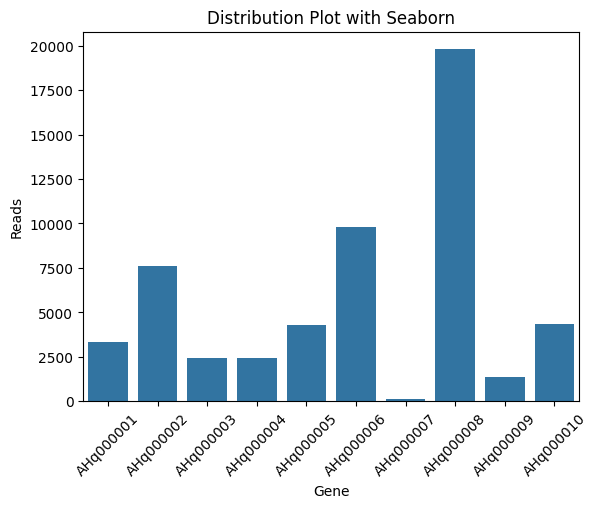

In [12]:
data = counts_caudatus.sum_reads[(counts_caudatus.sum_reads > 10000) & (counts_caudatus.sum_reads < 20000)]

plot_distribution(counts_caudatus[:10].sum_reads)